In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
from preprocessing import filter_embedding_options, EMBEDDING_OPTIONS

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [4]:
experiment_id = 102 # 97 # 100
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

In [5]:
experiment_info

{'ID': 102,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'blues'],
   ['classical', 'classical'],
   ['country', 'country'],
   ['disco', 'disco'],
   ['hiphop', 'hiphop'],
   ['jazz', 'jazz'],
   ['metal', 'metal'],
   ['pop', 'pop'],
   ['reggae', 'reggae'],
   ['rock', 'rock']]},
 'type': 'quantum',
 'preprocessing': {'reduction_method': 'pca',
  'scaler': {'Angle': [0, 1.5707963267948966], 'ZZMap': [0, 1], 'IQP': [0, 1]},
  'kwargs': {'ZZMap': {'depth': 10}, 'IQP': {'depth': 10}},
  'embedding_list': ['IQP']},
 'model': {'circuit_list': ['U_5'], 'classification_type': 'ova'},
 'train': {'iterations': 300, 'test_size': 0.3, 'random_state': 39},
 'extra_info': 'main, ova, IQP'}

In [6]:
experiment_time_info

{'pca-8-quantum-IQP-U_5-blues-blues': 2635.9687173366547,
 'pca-8-quantum-IQP-U_5-classical-classical': 2744.5873267650604,
 'pca-8-quantum-IQP-U_5-country-country': 2897.196135044098,
 'pca-8-quantum-IQP-U_5-disco-disco': 2432.0214414596558,
 'pca-8-quantum-IQP-U_5-hiphop-hiphop': 2252.8704690933228,
 'pca-8-quantum-IQP-U_5-jazz-jazz': 2887.5319254398346,
 'pca-8-quantum-IQP-U_5-metal-metal': 2716.4826169013977,
 'pca-8-quantum-IQP-U_5-pop-pop': 2004.4721457958221,
 'pca-8-quantum-IQP-U_5-reggae-reggae': 1932.2328414916992,
 'pca-8-quantum-IQP-U_5-rock-rock': 1880.8573582172394}

In [7]:
result_data.head()

,model,circuit,circuit_param_count,reduction_method,reduction_size,embedding_option,embedding_class,embedding_permutation,target_levels_list,target_levels,accuracy,precision,recall,f1,loss_train_history,loss_test_history,y_hat,y_test
0,pca-8-quantum-IQP-U_5-blues-blues,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[blues, blues]",blues-blues,0.513,0.147,0.962,0.255,0 16.876 1 16.672 2 16.727 3 ...,0 13.127 1 14.956 2 16.351 3 ...,0 1 1 1 2 0 3 1 4 1 ...,0 1 1 1 2 1 3 1 4 1 ...
1,pca-8-quantum-IQP-U_5-classical-classical,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[classical, classical]",classical-classical,0.830,0.347,0.862,0.495,0 16.682 1 18.030 2 15.637 3 ...,0 16.996 1 14.155 2 15.631 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 1 4 0 ...
2,pca-8-quantum-IQP-U_5-country-country,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[country, country]",country-country,0.513,0.171,0.853,0.284,0 23.391 1 18.882 2 18.924 3 ...,0 17.109 1 25.034 2 24.648 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 1 1 1 2 0 3 1 4 1 ...
3,pca-8-quantum-IQP-U_5-disco-disco,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[disco, disco]",disco-disco,0.563,0.153,0.852,0.260,0 16.542 1 16.356 2 16.500 3 ...,0 19.357 1 19.209 2 18.905 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 0 4 0 ...
4,pca-8-quantum-IQP-U_5-hiphop-hiphop,U_5,10.0,pca,8.0,IQP,IQP,1.0,"[hiphop, hiphop]",hiphop-hiphop,0.790,0.261,0.600,0.364,0 18.787 1 17.925 2 17.234 3 ...,0 16.255 1 17.569 2 18.310 3 ...,0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 0 4 0 ...


In [8]:
result_data.shape

(10, 18)

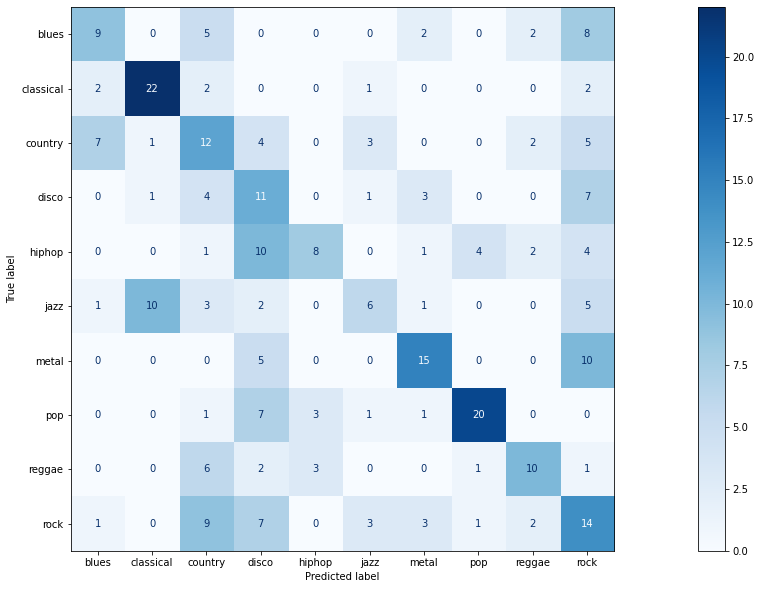

In [9]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-IQP-U_5"
)

In [10]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.45      0.35      0.39        26
   classical       0.65      0.76      0.70        29
     country       0.28      0.35      0.31        34
       disco       0.23      0.41      0.29        27
      hiphop       0.57      0.27      0.36        30
        jazz       0.40      0.21      0.28        28
       metal       0.58      0.50      0.54        30
         pop       0.77      0.61      0.68        33
      reggae       0.56      0.43      0.49        23
        rock       0.25      0.35      0.29        40

    accuracy                           0.42       300
   macro avg       0.47      0.42      0.43       300
weighted avg       0.47      0.42      0.43       300



In [11]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

,country,metal,disco,jazz,rock,classical,reggae,pop,blues,hiphop,Average
country,0.513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513
metal,NaN,0.843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.843
disco,NaN,NaN,0.563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563
jazz,NaN,NaN,NaN,0.737,NaN,NaN,NaN,NaN,NaN,NaN,0.737
rock,NaN,NaN,NaN,NaN,0.607,NaN,NaN,NaN,NaN,NaN,0.607
classical,NaN,NaN,NaN,NaN,NaN,0.83,NaN,NaN,NaN,NaN,0.830
reggae,NaN,NaN,NaN,NaN,NaN,NaN,0.81,NaN,NaN,NaN,0.810
pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873,NaN,NaN,0.873
blues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513,NaN,0.513
hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79,0.790


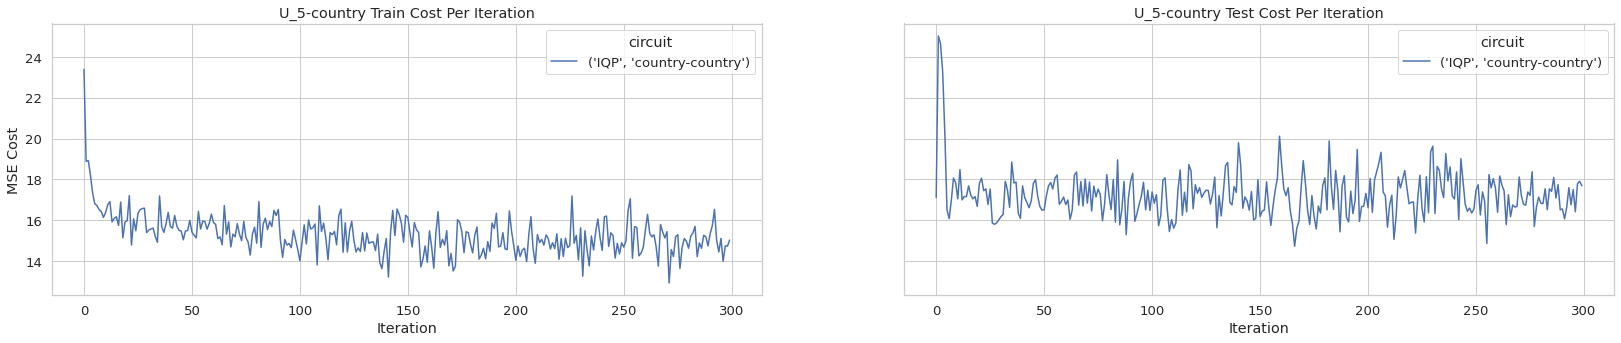

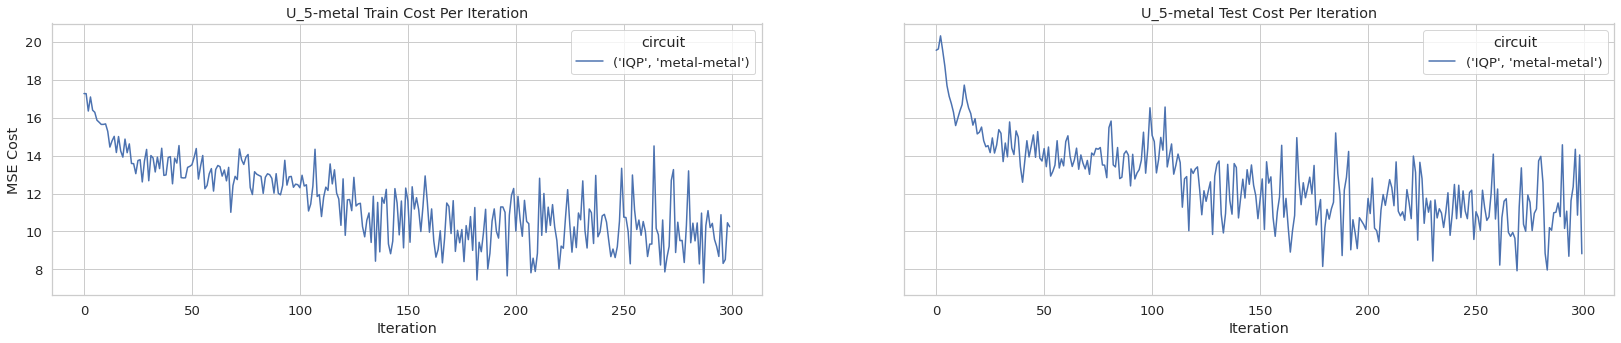

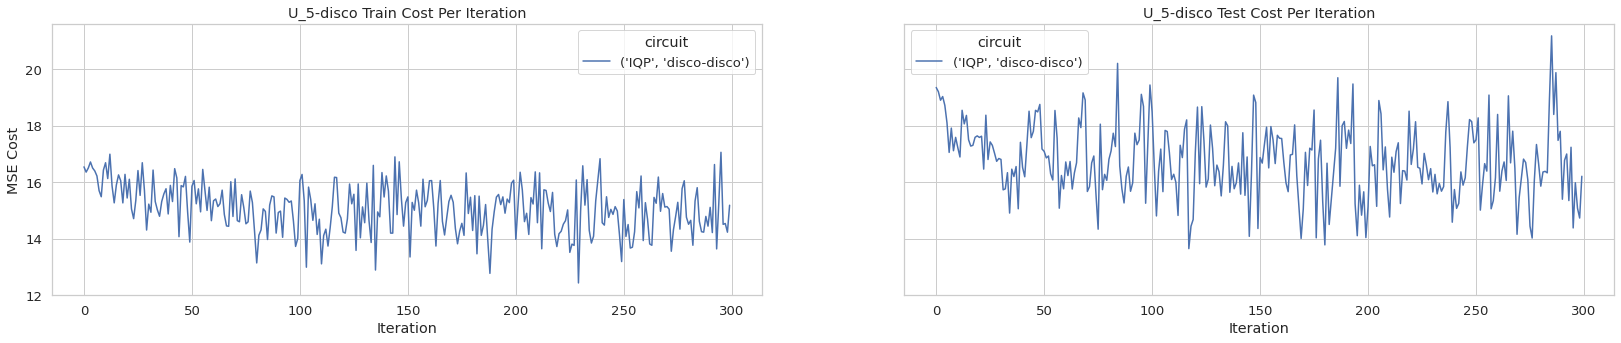

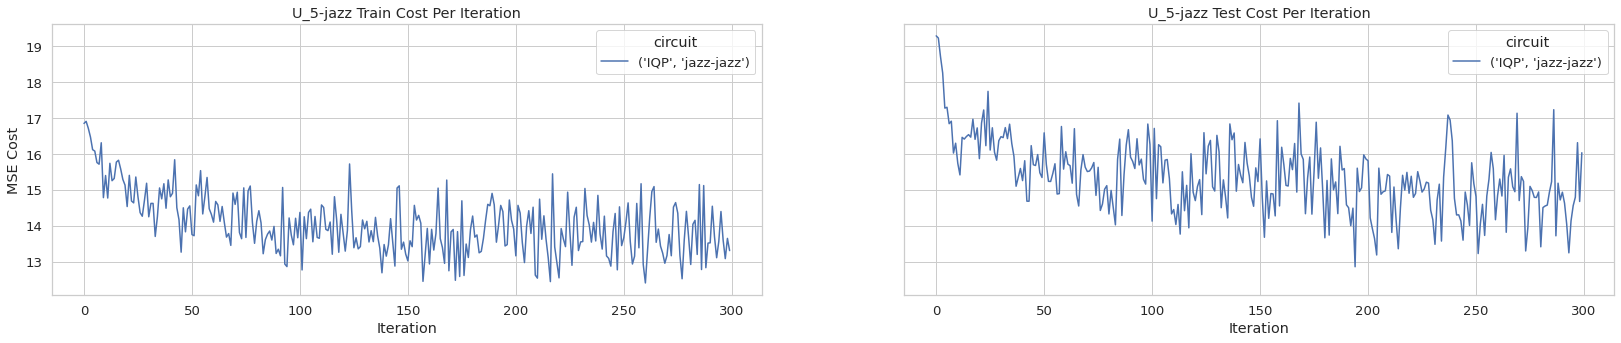

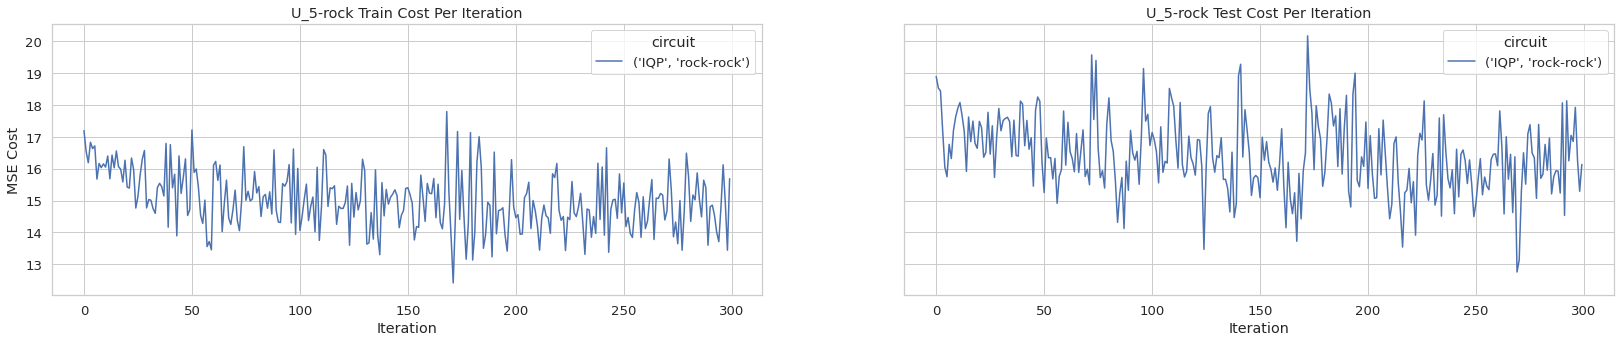

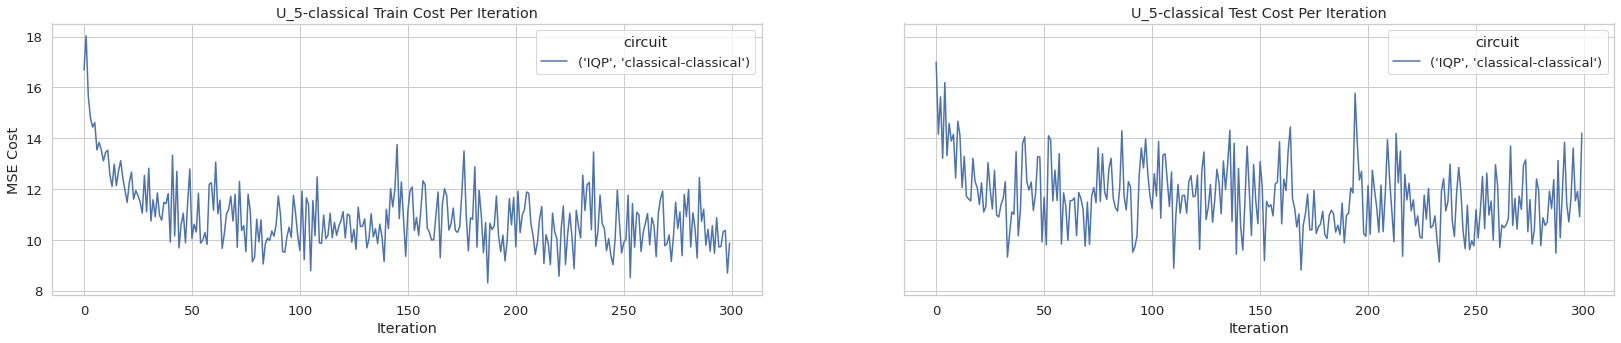

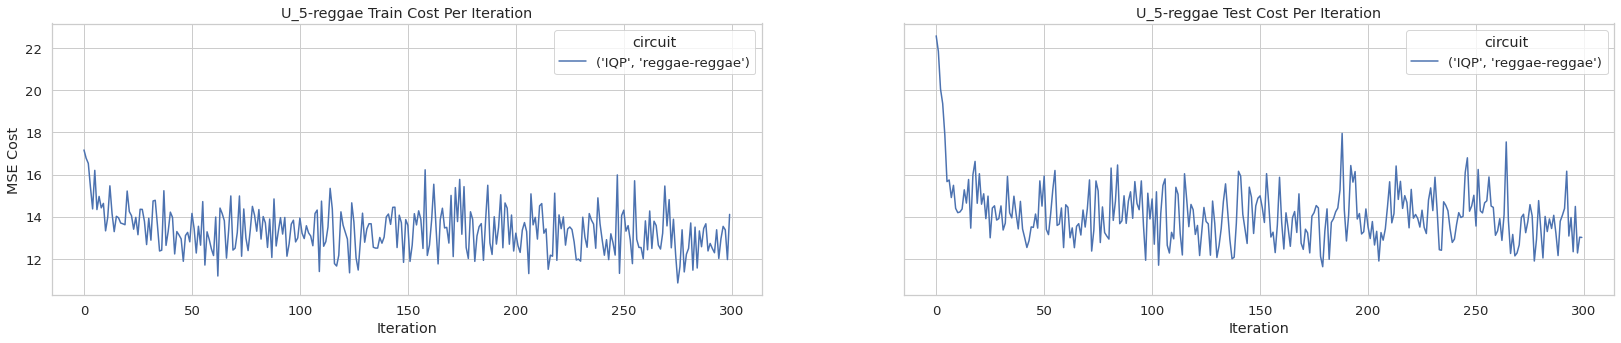

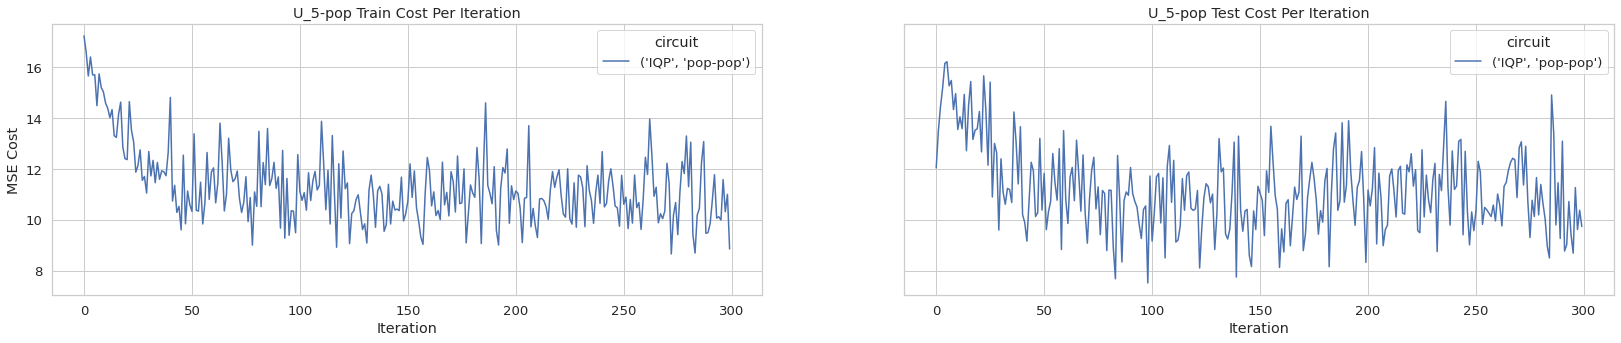

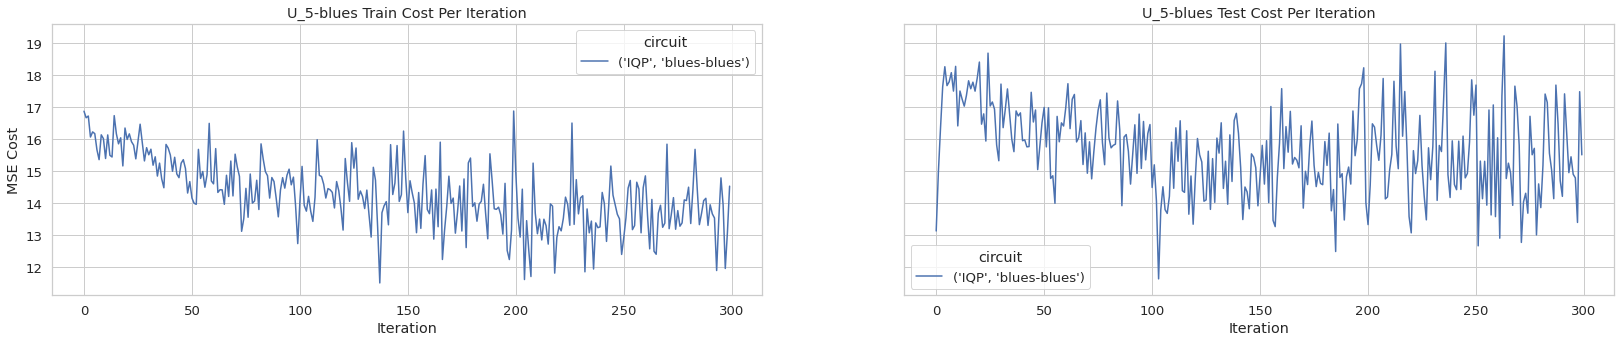

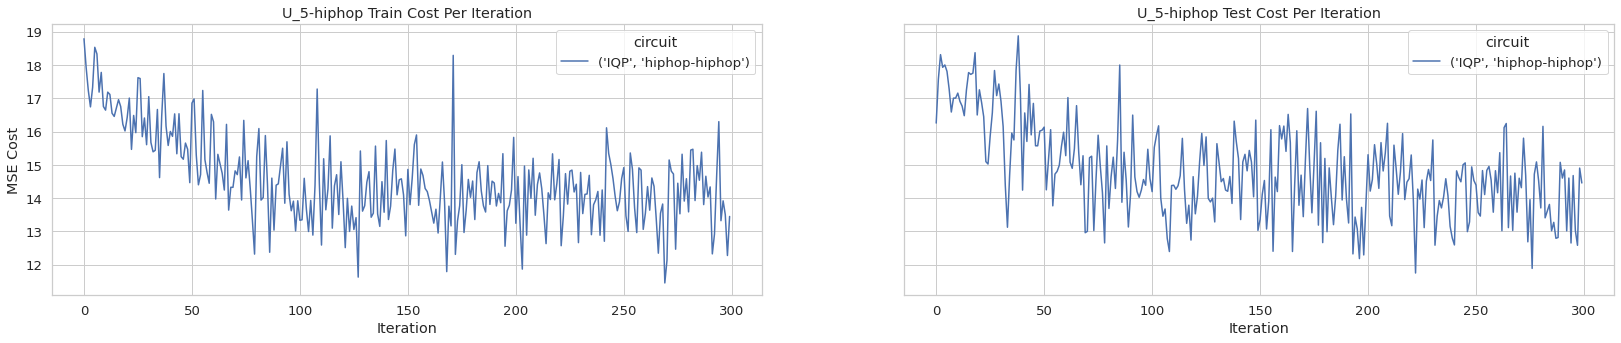

In [12]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
for level in distinct_levels:
    plot_loss(result_data, ["circuit", "embedding_option", "target_levels"], [f"{level}"], figsize=(28, 5))